# MLP to classify fashion MNIST dataset
---
Following example from Chapter 10 of _Hands on Machine Learning with Scikit-Learn, Keras and TensorFlow, 2nd ed_

In [18]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
tf.__version__

'2.2.0'

## Load the data
---

In [2]:
# get data using keras utility
# this contains 60,000 28 x 28 ndarrays with values between 0 and 255, representing pixel intensities
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

# split train full into train and valid, and normalise so input is float between 0 and 1
x_valid, x_train = x_train_full[:5000] / 255.0, x_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# manually type out the class names 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Set up model using high level API `keras.models.Sequential`
---
This API is highest level, main steps are
1. Define the model structure by passing `keras.layers` to the `keras.models.Sequential` constructor
2. Specify the loss function and optimizer to be used for model training, and any extra metrics that we want to keep track of during training
3. Compile the model
4. Train the model

In [10]:
# next specify a simple sequential model using keras api

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=x_train[0].shape))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(len(class_names), activation='softmax'))

# compile the model and specify the loss function
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.SGD(learning_rate=0.1),
    metrics=["accuracy"]
    )

# check the summary
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_13 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [16]:
# now train the model and record the metrics
history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
430/430 [==============================] - 14s 32ms/step - loss: 0.4469 - accuracy: 0.8395 - val_loss: 0.4113 - val_accuracy: 0.8498
Epoch 2/10
430/430 [==============================] - 14s 33ms/step - loss: 0.3962 - accuracy: 0.8568 - val_loss: 0.3959 - val_accuracy: 0.8568
Epoch 3/10
430/430 [==============================] - 14s 33ms/step - loss: 0.3680 - accuracy: 0.8656 - val_loss: 0.3682 - val_accuracy: 0.8660
Epoch 4/10
430/430 [==============================] - 15s 36ms/step - loss: 0.3477 - accuracy: 0.8723 - val_loss: 0.3591 - val_accuracy: 0.8742
Epoch 5/10
430/430 [==============================] - 14s 34ms/step - loss: 0.3313 - accuracy: 0.8787 - val_loss: 0.3380 - val_accuracy: 0.8730
Epoch 6/10
430/430 [==============================] - 14s 32ms/step - loss: 0.3164 - accuracy: 0.8837 - val_loss: 0.3448 - val_accuracy: 0.8756
Epoch 7/10
430/430 [==============================] - 14s 33ms/step - loss: 0.3038 - accuracy: 0.8884 - val_loss: 0.3150 - val_accuracy:

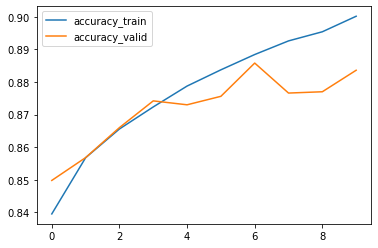

In [20]:
plt.plot(history.history['accuracy'] , label='accuracy_train')
plt.plot(history.history['val_accuracy'] , label='accuracy_valid')
plt.legend()